In [1]:

#!pip install --upgrade ../../tradeframework
#!pip install --upgrade ~/Development/repos/quantutils

#import tradeframework
from tradeframework.api import Derivative, Portfolio, Optimizer, Model, TradeEnvironment, TradeEngine, AssetInfo
from tradeframework.environments import SandboxEnvironment, SandboxContext, ZiplineEnvironment
from tradeframework.models import PreOpenMomentum




In [2]:
import pandas as pd
import numpy as np

import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# STRATEGY SET UP
txCost = 0
ts = pd.read_csv('data/WallSt-hourly-all.txt', index_col=0, parse_dates=[[0, 1]], dayfirst=True )
#ts = ts["2016-07-06":]

import pytz
# PreOpenMomentum model relies on timeseries being in local time zone
ts.index = ts.index.tz_localize("Europe/London").tz_convert("US/Eastern")

# Resample into hourly data
#order = ts.columns
#ts = ts.resample('5min').agg({'Open': 'first', 'High': 'max', 'Low': 'min','Close': 'last'})[order]


# Remove hours we are not interested in
#ts[(ts.index.hour > 19) | (ts.index.hour < 12)] = np.nan

# Resample into Business Days
#ts = ts.resample('5min').agg({'Open': 'first', 'High': 'max', 'Low': 'min','Close': 'last'})[order]
#

In [3]:
bEnv = SandboxEnvironment("TradeFair")
p = bEnv.createPortfolio("Baseline", optimizer=bEnv.createOptimizer("EqualWeightsOptimizer", "EqualWeights"))
#p.addModel(bEnv.createModel( "BuyAndHold", "D3-BuyAndHold", args=("15:00", "16:00")))
p.addModel(bEnv.createModel( "BuyAndHold", "D3-BuyAndHold"))
baseline = bEnv.handleData({}, AssetInfo("DOW", ts)).assets[0]

In [4]:
env = SandboxEnvironment("TradeFair")
context = {}

opt = env.createOptimizer("KellyOptimizer", "KellyOpt")#, opts={"window":40*24, "weight":.01})
#opt = env.createOptimizer("EqualWeightsOptimizer", "EqualWeights")
p = env.createPortfolio("MyPortfolio", optimizer=opt)

#p.addModel(env.createModel( "PreOpenMomentum", "D1-PreOpenMomentum" ))
p.addModel(env.createModel( "BuyAndHold", "D2-BuyAndHold" ))

#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold7", args=("09:00", "10:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold6", args=("10:00", "11:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold5", args=("11:00", "12:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold4", args=("12:00", "13:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold3", args=("13:00", "14:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold2", args=("14:00", "15:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold1", args=("15:00", "16:00")))

#p.addModel(env.createModel( "SellAndHold", "D4-SellAndHold", args=("15:00", "16:00")))
threshold = 0
#p.addModel(env.createModel( "MarketInsightsV2Model", "D3-FinalHourML1", args=('cred/MIOapi_cred.json', 'cred/functions_cred.json', '265e2f7f3e06af1c6fc9e74434514c86', 'd2c3feaf6aad96c984f1b65ad4718aa4', threshold)))
#p.addModel(env.createModel( "MarketInsightsV2Model", "D3-FinalHourML2", args=('cred/MIOapi_cred.json', 'cred/functions_cred.json', '265e2f7f3e06af1c6fc9e74434514c86', '5404d26bccc568c4bddfc45f37d8fbfb', threshold)))
#p.addModel(env.createModel( "MarketInsightsV2Model", "D3-FinalHourML3", args=('cred/MIOapi_cred.json', 'cred/functions_cred.json', '265e2f7f3e06af1c6fc9e74434514c86', '9c92fb9e92ce3c502995b77eca6d617f', threshold)))
#p.addModel(env.createModel( "MarketInsightsV2Model", "D3-FinalHourML4", args=('cred/MIOapi_cred.json', 'cred/functions_cred.json', '265e2f7f3e06af1c6fc9e74434514c86', 'b765be85d6b48ee7db41548fb4424f9e', threshold)))

# Feed data into the portfolio

#for index in range(0, len(ts)):
#env.handleData(0, ts[:index+1])
dInfo = env.handleData(context, AssetInfo("DOW", ts)) # TODO this should be "getDerivative" or "backTest"


In [5]:
import numpy as np
np.zeros((3,0))


array([], shape=(3, 0), dtype=float64)

Derivative name : MyPortfolio
Number of assets : 1
Baseline name : Baseline


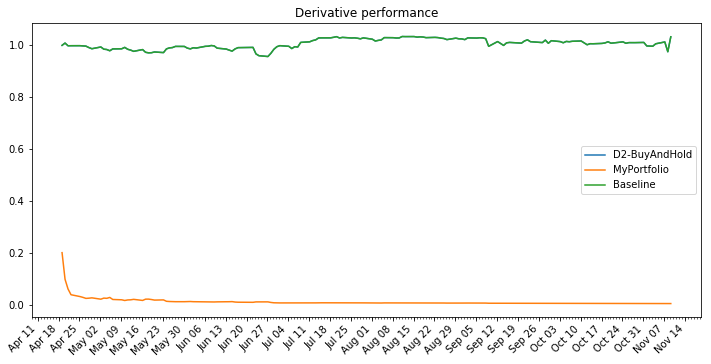

TradeFair_Portfolio                   \
                                      Capital                    
                                         Open            Close   
Date_Time                                                        
2016-04-19 11:00:00-04:00    10000.0000000000  2118.4805155137   
2016-04-19 12:00:00-04:00     2121.6401279014  2229.6096597802   
2016-04-19 13:00:00-04:00     2232.9817692057  1773.5362939714   
2016-04-19 14:00:00-04:00     1759.7340752660  1775.9117390134   
2016-04-19 15:00:00-04:00     1779.1138970098  1679.9060921895   
...                                       ...              ...   
2016-11-09 12:00:00-05:00       56.6940866030    56.6747847108   
2016-11-09 13:00:00-05:00       56.6723725873    56.8827213874   
2016-11-09 14:00:00-05:00       56.8875426483    57.7157442311   
2016-11-09 15:00:00-05:00       57.7283345252    57.4703511083   
2016-11-09 16:00:00-05:00       57.4886138676    57.5979586974   

                                      DOW                                 \
                               Allocation                          Trade   
                                      bar            gap             bar   
Date_Time                                                                  
2016-04-19 11:00:00-04:00  148.7079148016  31.5961238778  148.7079148016   
2016-04-19 12:00:00-04:00  -10.6900526613 -11.2403647515  -42.2861765391   
2016-04-19 13:00:00-04:00  -17.4032376983 -13.8022187054   -6.1628729467   
2016-04-19 14:00:00-04:00   -3.1720909309  -3.2021579964   10.6301277745   
2016-04-19 15:00:00-04:00   -5.2214634116  -4.9251127287   -2.0193054152   
...                                   ...            ...             ...   
2016-11-09 12:00:00-05:00    0.0120636826   0.0120606176    0.0034741453   
2016-11-09 13:00:00-05:00    0.0120199314   0.0120531522   -0.0000406862   
2016-11-09 14:00:00-05:00    0.0124541591   0.0125902941    0.0004010070   
2016-11-09 15:00:00-05:00    0.0140974545   0.0140482764    0.0015071604   
2016-11-09 16:00:00-05:00    0.0136681037   0.0136681037   -0.0003801727   

                                           
                                           
                                      gap  
Date_Time                                  
2016-04-19 11:00:00-04:00 -117.1117909238  
2016-04-19 12:00:00-04:00   -0.5503120903  
2016-04-19 13:00:00-04:00    3.6010189929  
2016-04-19 14:00:00-04:00   -0.0300670655  
2016-04-19 15:00:00-04:00    0.2963506829  
...                                   ...  
2016-11-09 12:00:00-05:00   -0.0000030650  
2016-11-09 13:00:00-05:00    0.0000332208  
2016-11-09 14:00:00-05:00    0.0001361350  
2016-11-09 15:00:00-05:00   -0.0000491781  
2016-11-09 16:00:00-05:00    0.0000000000  

[3454 rows x 6 columns]

Merton measure of Market Timing : 49.52% predictability
p1 + p2 : 0.9998547042218906
p-value : 0.5047698953670307



Start date,2016-04-19
End date,2016-11-09
Total months,164
,Backtest
Annual return,-31.3%
Cumulative returns,-99.4%
Annual volatility,43.3%
Sharpe ratio,-0.54
Calmar ratio,-0.32
Stability,0.69
Max drawdown,-99.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,99.45,2016-04-19,2016-11-09,NaT,NaN
1,0.00,2016-04-19,2016-04-19,2016-04-19,1
2,0.00,2016-04-19,2016-04-19,2016-04-19,1
3,0.00,2016-04-19,2016-04-19,2016-04-19,1
4,0.00,2016-04-19,2016-04-19,2016-04-19,1


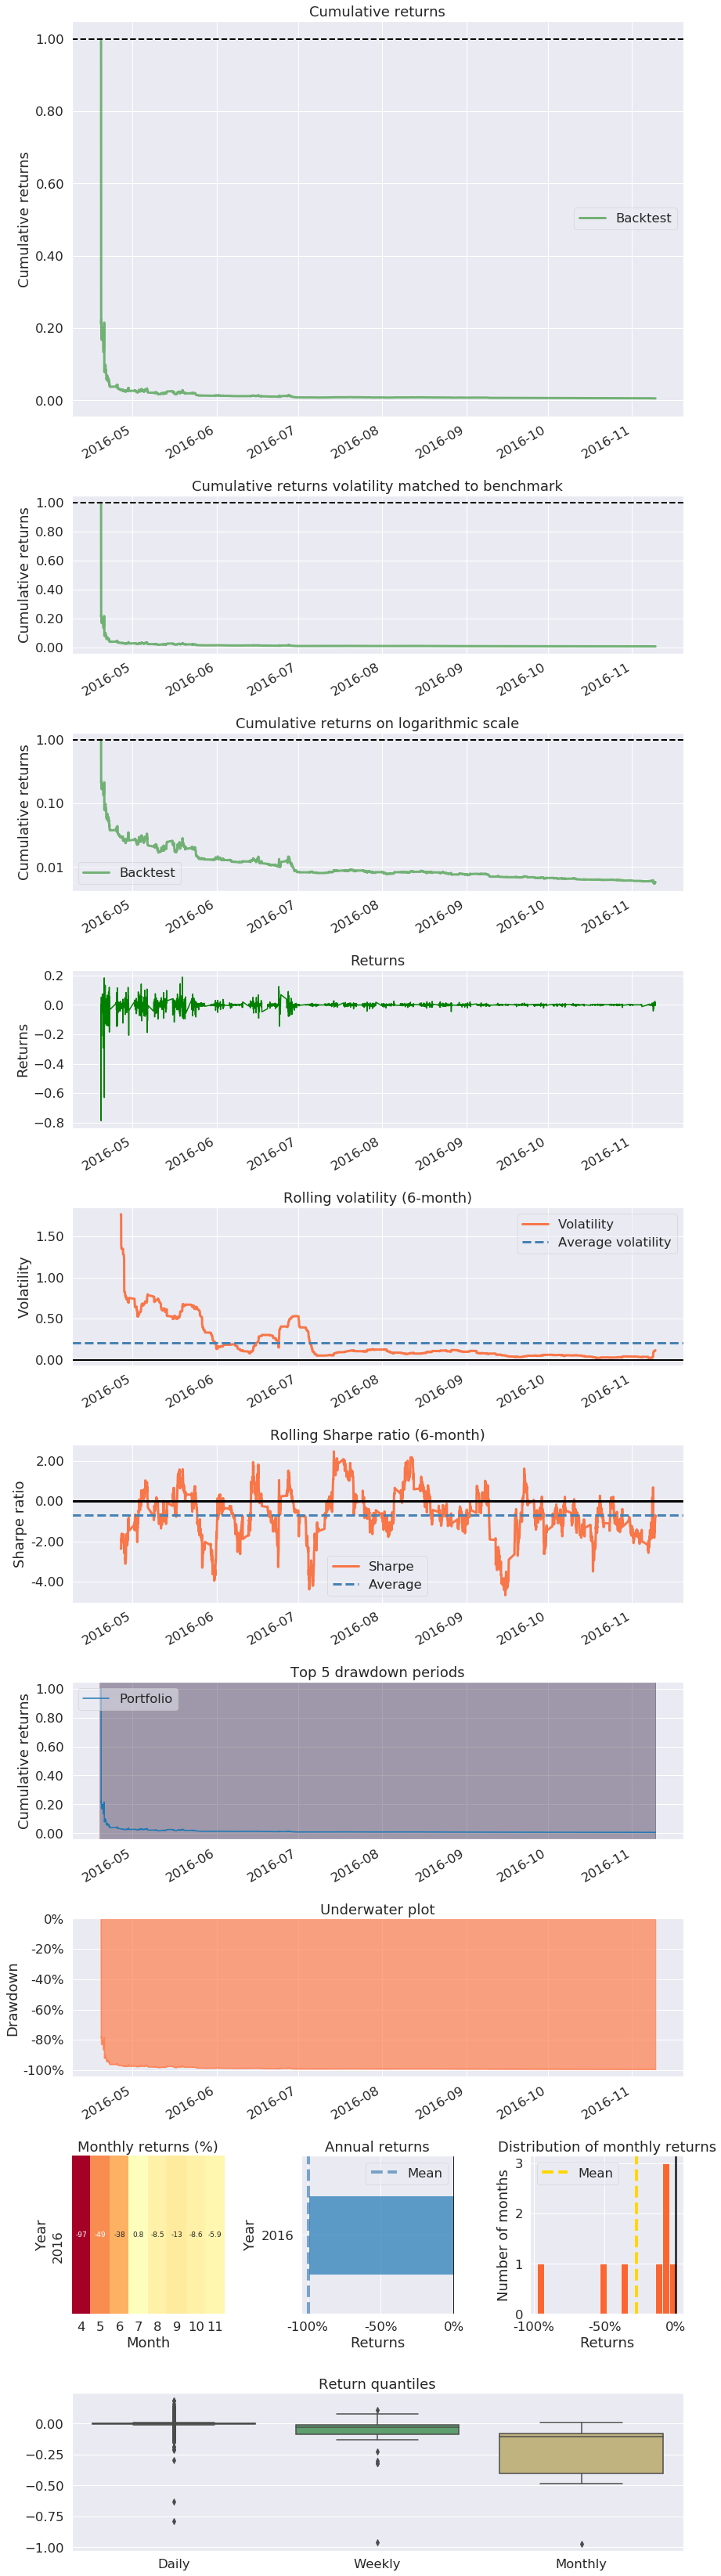

In [5]:
import tradeframework.utils.trader as trader
tInfo = env.getTradingInfo(context, dInfo, 10000)
trader.displaySummary(dInfo.assets[0], tInfo, baseline)

Derivative name : MyPortfolio
Number of assets : 1
Baseline name : Baseline


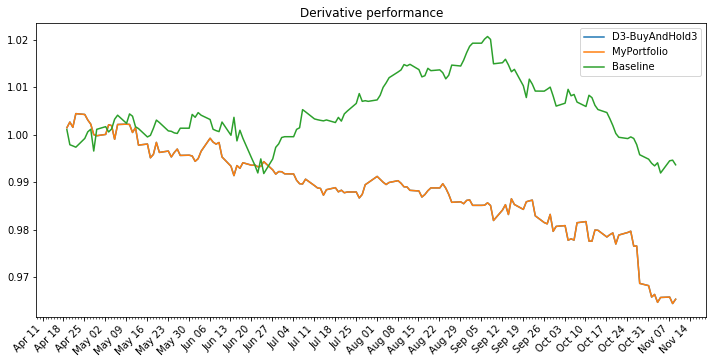

TradeFair_Portfolio                             DOW  \
                                      Capital                      Allocation   
                                         Open             Close           bar   
Date_Time                                                                       
2016-04-19 13:00:00-04:00    10000.0000000000  10014.6563258146  0.5551638566   
2016-04-20 13:00:00-04:00    10014.6563258146  10026.7061272784  0.5527431864   
2016-04-21 13:00:00-04:00    10026.7061272784  10015.5807945436  0.5562666367   
2016-04-22 13:00:00-04:00    10015.5807945436  10044.3921656376  0.5583599049   
2016-04-25 13:00:00-04:00    10044.3921656376  10042.6009431295  0.5597570338   
...                                       ...               ...           ...   
2016-11-03 13:00:00-04:00     9663.9801354769   9647.3218067291  0.5373654435   
2016-11-04 13:00:00-04:00     9647.3218067291   9657.5872020778  0.5374552539   
2016-11-07 13:00:00-05:00     9657.5872020778   9658.3812852994  0.5293888144   
2016-11-08 13:00:00-05:00     9658.3812852994   9644.7327566690  0.5249434089   
2016-11-09 13:00:00-05:00     9644.7327566690   9653.8494012750  0.5209511203   

                                                            
                                       Trade                
                           gap           bar           gap  
Date_Time                                                   
2016-04-19 13:00:00-04:00  0.0  0.5551638566 -0.5551638566  
2016-04-20 13:00:00-04:00  0.0  0.5527431864 -0.5527431864  
2016-04-21 13:00:00-04:00  0.0  0.5562666367 -0.5562666367  
2016-04-22 13:00:00-04:00  0.0  0.5583599049 -0.5583599049  
2016-04-25 13:00:00-04:00  0.0  0.5597570338 -0.5597570338  
...                        ...           ...           ...  
2016-11-03 13:00:00-04:00  0.0  0.5373654435 -0.5373654435  
2016-11-04 13:00:00-04:00  0.0  0.5374552539 -0.5374552539  
2016-11-07 13:00:00-05:00  0.0  0.5293888144 -0.5293888144  
2016-11-08 13:00:00-05:00  0.0  0.5249434089 -0.5249434089  
2016-11-09 13:00:00-05:00  0.0  0.5209511203 -0.5209511203  

[147 rows x 6 columns]

KeyError: "None of [DatetimeIndex(['2016-04-19 13:00:00-04:00', '2016-04-20 13:00:00-04:00',\n               '2016-04-21 13:00:00-04:00', '2016-04-22 13:00:00-04:00',\n               '2016-04-25 13:00:00-04:00', '2016-04-26 13:00:00-04:00',\n               '2016-04-27 13:00:00-04:00', '2016-04-28 13:00:00-04:00',\n               '2016-04-29 13:00:00-04:00', '2016-05-02 13:00:00-04:00',\n               ...\n               '2016-10-27 13:00:00-04:00', '2016-10-28 13:00:00-04:00',\n               '2016-10-31 13:00:00-04:00', '2016-11-01 13:00:00-04:00',\n               '2016-11-02 13:00:00-04:00', '2016-11-03 13:00:00-04:00',\n               '2016-11-04 13:00:00-04:00', '2016-11-07 13:00:00-05:00',\n               '2016-11-08 13:00:00-05:00', '2016-11-09 13:00:00-05:00'],\n              dtype='datetime64[ns, US/Eastern]', name='Date_Time', length=144, freq=None)] are in the [index]"

In [64]:
import tradeframework.utils.trader as trader
tInfo = env.getTradingInfo(context, dInfo, 10000)
trader.displaySummary(dInfo.assets[0], tInfo, baseline)

In [65]:
import numpy as np 
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    result = result / max(result)
    return result

In [66]:
a = dRet
#a -= np.mean(a)
a = autocorr(a)
a

NameError: name 'dRet' is not defined

In [161]:
#dRet = dInfo.returns.Close + 1
dRet = trader.getPeriodReturns(dInfo.returns) + 1
#dRet = x.resample('B').agg('prod')
pnl = np.cumprod(dRet)

In [61]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dRet-1, lags=50)
pyplot.show()

NameError: name 'dRet' is not defined

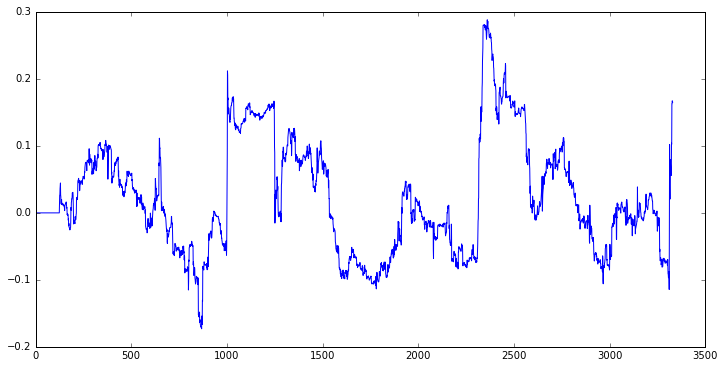

In [186]:
#pyplot.plot(ac_win(dRet))
pyplot.plot(ac_win(dRet, lag=2))
pyplot.show()

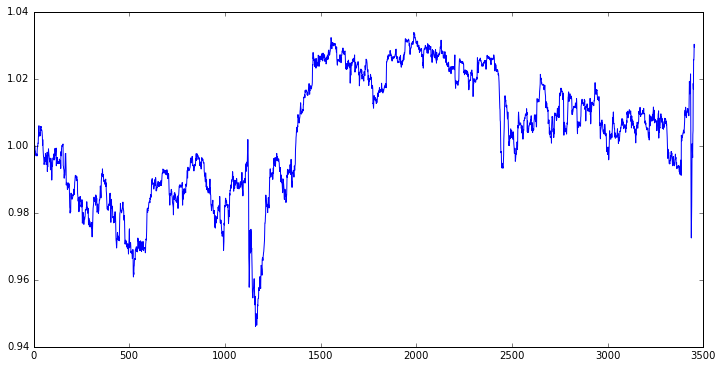

In [179]:
pyplot.plot(pnl.values)
pyplot.show()

In [184]:
def ac_win(dRet, window=250, lag=1):
    ac = [0] * (window//2)
    for i in range(window, len(dRet)):
        sample = dRet[i-window:i]
        ac.append(autocorr(sample)[lag])
    return ac

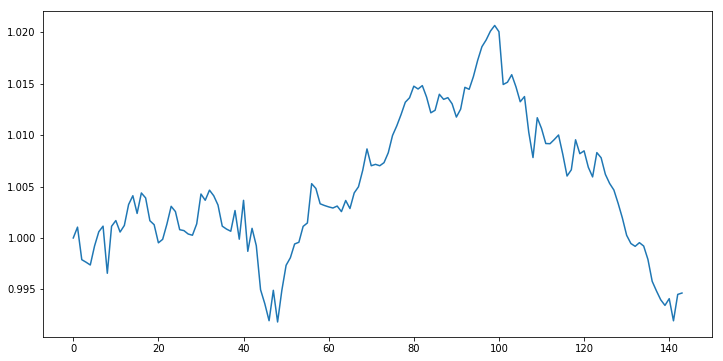

In [100]:

from matplotlib import pyplot
pyplot.plot(tInfo.values[:,0]/10000)
pyplot.show()

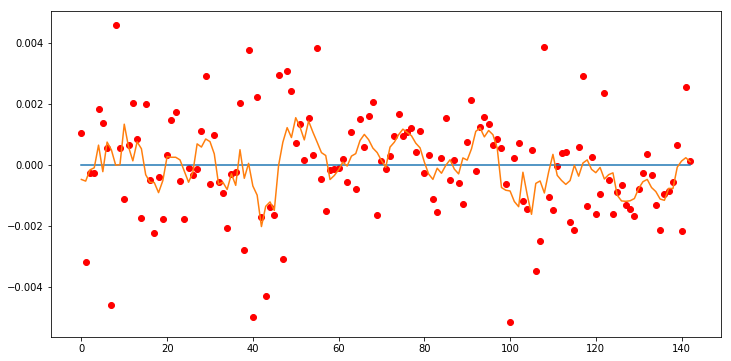

In [101]:

from matplotlib import pyplot
x = np.diff(tInfo.values[:,0]/10000)
lags = 5
ma = np.convolve(x, np.ones((lags,))/lags, mode='same')
pyplot.plot(x,'ro')
pyplot.plot([0] * len(x))
pyplot.plot(ma)
pyplot.show()

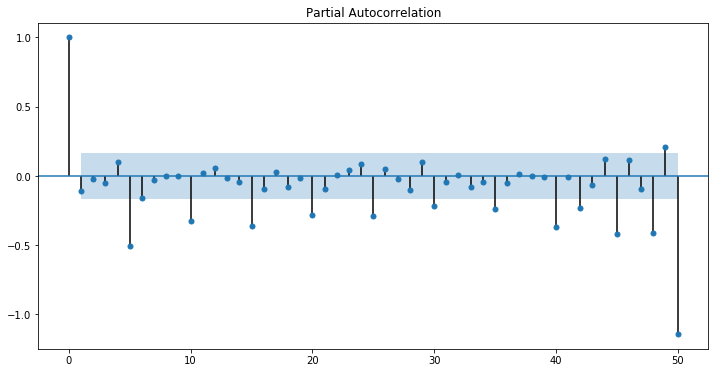

(-3.42891167911899,
 0.01001188378489629,
 13,
 132,
 {'1%': -3.4808880719210005,
  '5%': -2.8836966192225284,
  '10%': -2.5785857598714417},
 -1683.509126600969)

In [85]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
plot_pacf(np.diff(ma), lags=50)
pyplot.show()
adfuller(ma)

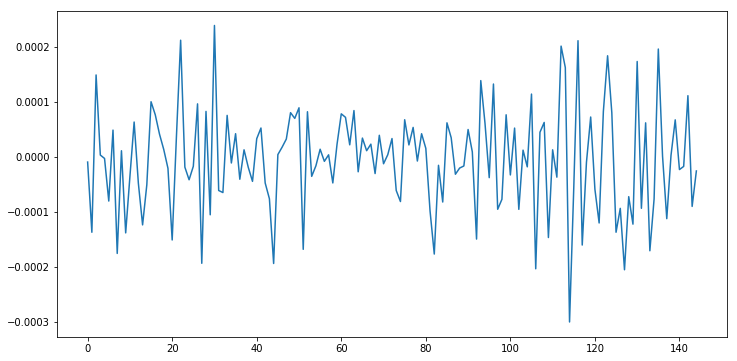

In [70]:

from matplotlib import pyplot
pyplot.plot(np.diff(ma))
pyplot.show()